In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore", message="max_features will be set to None")
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

In [38]:
data = pd.read_csv('Data.csv')
data

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB
None


In [40]:
print(data.describe())

               accX          accY          accZ         gyroX         gyroY  \
count  31991.000000  31991.000000  31991.000000  31991.000000  31991.000000   
mean       0.023825      2.153858      9.537909     -0.004493     -0.014756   
std        0.741396      1.085466      2.056358      0.307643      0.249201   
min       -3.673361     -4.386029      4.296066     -1.470421     -1.430659   
25%       -0.472193      1.413062      7.794217     -0.149783     -0.162656   
50%       -0.024998      2.119143      9.406739      0.022301     -0.011060   
75%        0.477208      2.928435     11.158845      0.177978      0.124966   
max        4.678671      6.377039     17.591568      1.332722      1.480135   

              gyroZ      Activity  
count  31991.000000  31991.000000  
mean      -0.007021      0.982151  
std        0.266120      0.132404  
min       -1.894102      0.000000  
25%       -0.154126      1.000000  
50%        0.005261      1.000000  
75%        0.152061      1.000000  


##### Data Cleaning

In [41]:
print(data.isnull().sum())

accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64


In [42]:
data = data.drop_duplicates()
data

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


In [43]:
if 'timestamp' in data.columns:
    data = data.drop(columns=['timestamp'])
data

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,1
...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,1


##### Exploratory Data Analysis (EDA)

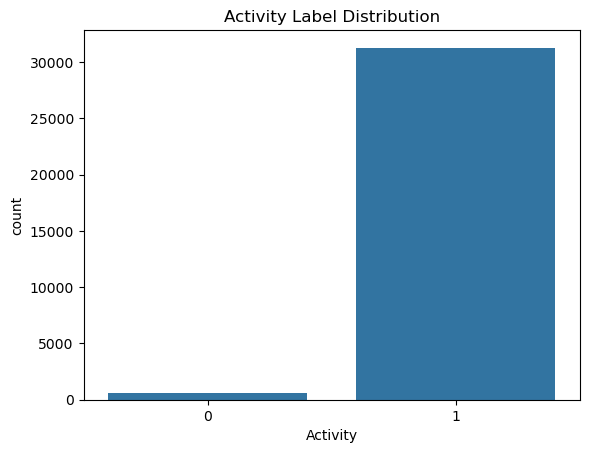

In [44]:
# Visualize the distribution of activity labels
sns.countplot(x='Activity', data=data)
plt.title('Activity Label Distribution')
plt.show()

In [45]:
# Split the dataset into X (features) and y (target variable)
X = data.drop(columns=['Activity'])
y = data['Activity']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Resampling the data using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

##### Model 1: Logistic Regression

In [49]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

In [50]:
# Evaluate Logistic Regression Model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.08      0.93      0.14       113
           1       1.00      0.80      0.89      6257

    accuracy                           0.80      6370
   macro avg       0.54      0.86      0.52      6370
weighted avg       0.98      0.80      0.88      6370



##### Model 2: Decision Tree Classifier

In [51]:
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_clf.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_clf.predict(X_test)

In [52]:
# Evaluate Decision Tree Model
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.29      0.30      0.29       113
           1       0.99      0.99      0.99      6257

    accuracy                           0.97      6370
   macro avg       0.64      0.64      0.64      6370
weighted avg       0.97      0.97      0.97      6370



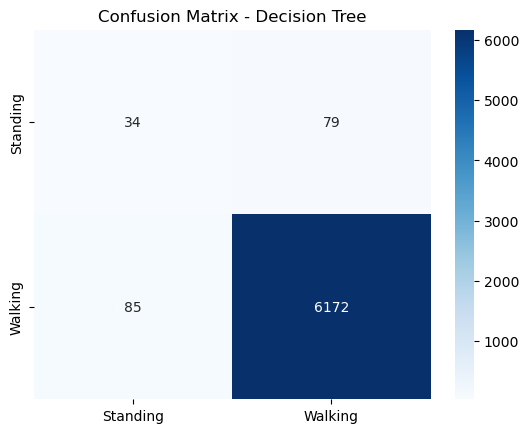

In [53]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Standing', 'Walking'], yticklabels=['Standing', 'Walking'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()

##### Model 3: Random Forest Classifier

In [54]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test)

In [55]:
# Evaluate Random Forest Model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.62      0.29      0.40       113
           1       0.99      1.00      0.99      6257

    accuracy                           0.98      6370
   macro avg       0.80      0.64      0.69      6370
weighted avg       0.98      0.98      0.98      6370



##### Hyperparameter Tuning for Decision Tree using GridSearchCV

In [56]:
dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None]
}

In [57]:
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),param_grid=dt_param_grid)

In [58]:
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [23]:
best_dt = dt_grid_search.best_estimator_

In [59]:
y_pred_dt = best_dt.predict(X_test)


In [60]:
print("Tuned Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Tuned Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.33      0.34      0.33       113
           1       0.99      0.99      0.99      6257

    accuracy                           0.98      6370
   macro avg       0.66      0.66      0.66      6370
weighted avg       0.98      0.98      0.98      6370



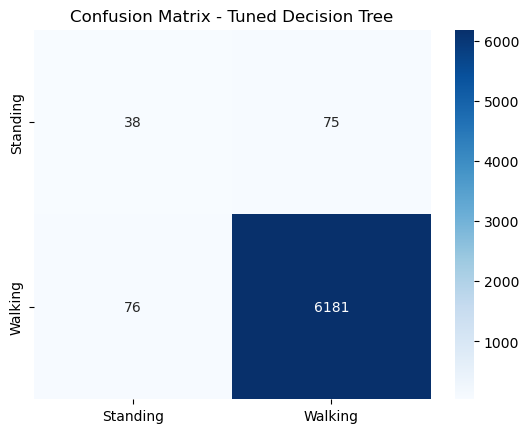

In [61]:
# Confusion Matrix for Tuned Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Standing', 'Walking'], yticklabels=['Standing', 'Walking'])
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()

##### Hyperparameter Tuning for Random Forest using GridSearchCV

In [27]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [28]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),param_grid=rf_param_grid,)

In [29]:
rf_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [30]:
best_rf = rf_grid_search.best_estimator_

In [31]:
y_pred_rf = best_rf.predict(X_test)

In [32]:
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44       113
           1       0.99      0.99      0.99      6257

    accuracy                           0.98      6370
   macro avg       0.69      0.75      0.72      6370
weighted avg       0.98      0.98      0.98      6370



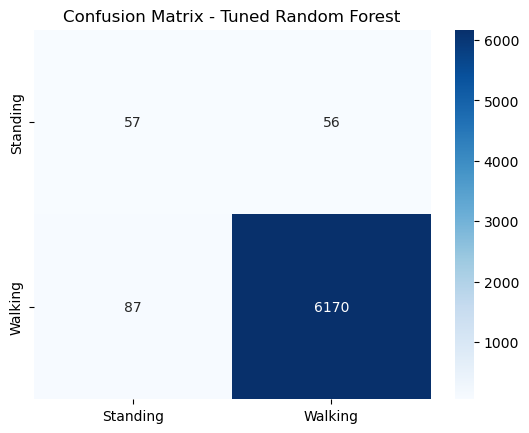

In [33]:
# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Standing', 'Walking'], yticklabels=['Standing', 'Walking'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

In [34]:
# ROC-AUC Score for all models
roc_auc_dt = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

In [35]:
print(f"ROC-AUC Score - Tuned Decision Tree: {roc_auc_dt:.4f}")
print(f"ROC-AUC Score - Tuned Random Forest: {roc_auc_rf:.4f}")

ROC-AUC Score - Tuned Decision Tree: 0.6621
ROC-AUC Score - Tuned Random Forest: 0.9368


In [36]:
results = {
    "Tuned Decision Tree": roc_auc_dt,
    "Tuned Random Forest": roc_auc_rf
}

# Display results
for model, auc in results.items():
    print(f"{model} - ROC-AUC: {auc:.4f}")

Tuned Decision Tree - ROC-AUC: 0.6621
Tuned Random Forest - ROC-AUC: 0.9368
